In [42]:
import numpy as np

In [43]:
#전처리기
def preprocess(text, stop_words=[]):
    text = text.lower()
    text = text.replace('.', '')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    processed_words = []

    for word in words:
        if word not in stop_words: #인자로 받은 stop_words와 동일한 문자가 있는 경우 해당 문자를 제외하고 전처리
            processed_words.append(word)
            #문자가 처음 본 문자인 경우 word_to_id와 id_to_word에 저장해줌
            if word not in word_to_id:
                new_id = len(word_to_id)
                word_to_id[word] = new_id
                id_to_word[new_id] = word
    #처리한 단어들을 문자 형태로 저장하는게 아닌 정수 인덱스로 저장
    corpus = np.array([word_to_id[w] for w in processed_words])
    return corpus, word_to_id, id_to_word

In [44]:
#동시발생행렬 (window_size = 1)
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    #특정 문자 좌우로 window_size만큼의 거리에 어떤 단어가 있는지 확인하는 과정
    #있다면 (특정문자의 인덱스, window_size만큼의 거리 안에 있는 단어의 인덱스) 위치의 값을 0에서 1로 수정
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i

            #특정 단어 왼쪽 부분을 탐색하는 부분
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            #특정 단어 오른쪽 부분을 탐색하는 부분
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [45]:
#코사인 유사도 함수
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

In [46]:
#유사단어 탐색
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    #해당 문자가 문자열에 존재하지 않는 단어인 경우
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print("\n[query] " + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    #각 행과 코사인 유사도를 계산하는 부분
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 유사도 높은 순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        #입력받은 문자의 행은 코사인 유사도가 무조건 1이므로 제외
        if id_to_word[i] == query:
            continue
        print(" %s: %s" % (id_to_word[i], similarity[i]))
        count += 1
        if count >= top:
            return

In [47]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
#window_size가 1인 경우
C = create_co_matrix(corpus, vocab_size)
print("window_size가 1일 때")
most_similar('you', word_to_id, id_to_word, C, top=5)

#window_size가 2인 경우
C = create_co_matrix(corpus, vocab_size,2)
print("\n\nwindow_size가 2일 때")
most_similar('you', word_to_id, id_to_word, C, top=5)


window_size가 1일 때

[query] you
 hello: 0.9999999800000005
 i: 0.7071067691154799
 goodbye: 0.7071067691154799
 and: 0.0
 say: 0.0


window_size가 2일 때

[query] you
 and: 0.8660253941251803
 i: 0.7071067726510136
 hello: 0.49999999292893216
 goodbye: 0.3535533863255068
 say: 0.24999999734834955


In [48]:
# stopwords 제거 전
corpus_with_stopwords, word_to_id_with_stopwords, id_to_word_with_stopwords = preprocess(text)
vocab_size = len(word_to_id_with_stopwords)
print("stopwords 제거 전\n")
print("window_size가 1일 때")
co_matrix_with_stopwords = create_co_matrix(corpus_with_stopwords, vocab_size)
most_similar('you', word_to_id_with_stopwords, id_to_word_with_stopwords, co_matrix_with_stopwords, top=5)

print("\nwindow_size가 2일 때")
co_matrix_with_stopwords_2 = create_co_matrix(corpus_with_stopwords, vocab_size,2)
most_similar('you', word_to_id_with_stopwords, id_to_word_with_stopwords, co_matrix_with_stopwords_2, top=5)

# stopwords 제거 후
corpus_without_stopwords, word_to_id_without_stopwords, id_to_word_without_stopwords = preprocess(text, stop_words=['and'])
vocab_size = len(word_to_id_without_stopwords)
print("\n\nstopwords 제거 후:")
print("\nwindow_size가 1일 때")
co_matrix_without_stopwords = create_co_matrix(corpus_without_stopwords, vocab_size)
most_similar('you', word_to_id_without_stopwords, id_to_word_without_stopwords, co_matrix_without_stopwords, top=5)


print("\nwindow_size가 2일 때")
co_matrix_without_stopwords_2 = create_co_matrix(corpus_without_stopwords, vocab_size,2)
most_similar('you', word_to_id_without_stopwords, id_to_word_without_stopwords, co_matrix_without_stopwords_2, top=5)

stopwords 제거 전

window_size가 1일 때

[query] you
 hello: 0.9999999800000005
 i: 0.7071067691154799
 goodbye: 0.7071067691154799
 and: 0.0
 say: 0.0

window_size가 2일 때

[query] you
 and: 0.8660253941251803
 i: 0.7071067726510136
 hello: 0.49999999292893216
 goodbye: 0.3535533863255068
 say: 0.24999999734834955


stopwords 제거 후:

window_size가 1일 때

[query] you
 hello: 0.9999999800000005
 i: 0.7071067691154799
 goodbye: 0.7071067691154799
 say: 0.0

window_size가 2일 때

[query] you
 i: 0.8660253941251803
 goodbye: 0.5773502627501202
 hello: 0.49999999292893216
 say: 0.4472135909234667


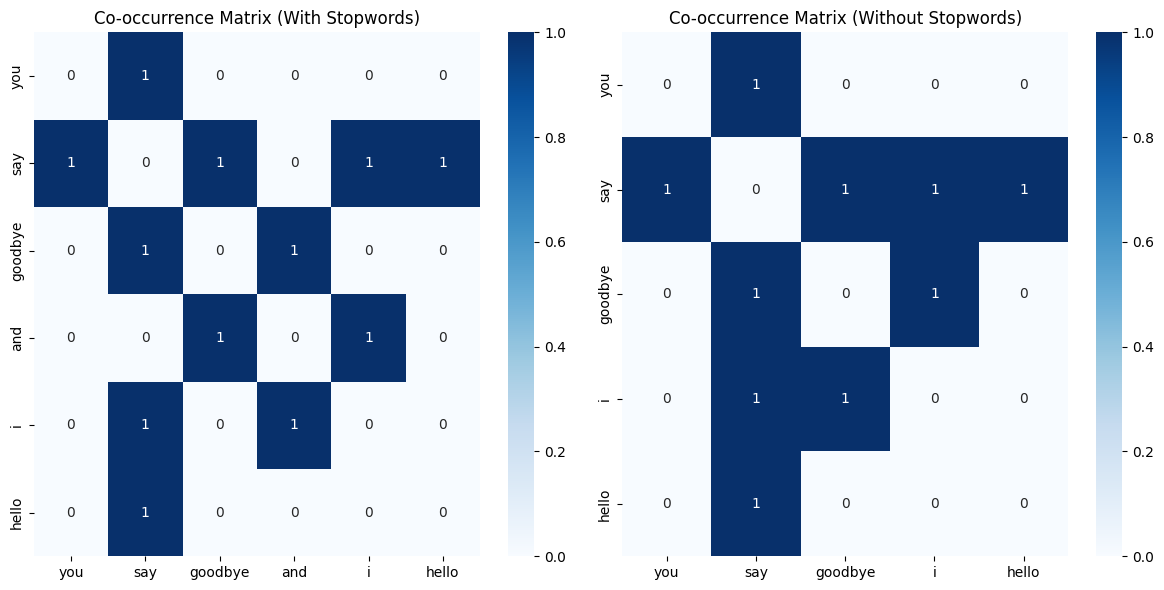

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(co_matrix_with_stopwords, annot=True, cmap='Blues',
            xticklabels=id_to_word_with_stopwords.values(),
            yticklabels=id_to_word_with_stopwords.values())
plt.title('Co-occurrence Matrix (With Stopwords)')

plt.subplot(1, 2, 2)
sns.heatmap(co_matrix_without_stopwords, annot=True, cmap='Blues',
            xticklabels=id_to_word_without_stopwords.values(),
            yticklabels=id_to_word_without_stopwords.values())
plt.title('Co-occurrence Matrix (Without Stopwords)')

plt.tight_layout()
plt.show()